In [137]:
import rasterio
from rasterio import features
from rasterio.enums import MergeAlg
from rasterio.plot import show
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
a = [6,56,56,98,56]
b = 5

[*a, b]

In [ ]:
image_data.shape

In [ ]:
rasterized.shape

In [141]:
data = np.array([*image_data, rasterized])

In [ ]:
23423, 34536

In [ ]:
np.expand_dims(rasterized, -1).transpose(2, 1, 0).shape

In [ ]:
for d in range(0, 1445 - 128, 128):
    print(d, d + 128)

In [ ]:
[[[1, 1 , 1], [1, 1 , 1],[1, 1 , 1]], [[2, 1 , 1], [1, 1 , 1],[1, 1 , 1]]][]

In [ ]:

for i, x_step in enumerate(range(0, width - tile_x, tile_x)):
    for j, y_step in enumerate(range(0, height - tile_y, tile_y)):

        chunk = data[:, y_step : y_step + tile_y, x_step : x_step + tile_x]
        image1 = chunk[:3]
        image2 = chunk[3:6]
        mask = chunk[6]

        print(image1.shape, image2.shape, mask.shape)

In [ ]:
np.append([rasterized], image_data, axis=0)

In [ ]:
data.shape

In [ ]:
comp_data.profile

In [346]:
comp_data = rasterio.open(
    r"input_data\google_imagery\Anotation\Final_input_data\5-2014_3-2022_composite_training.tif"
)
image_data = comp_data.read()
anotate_polygon = gpd.read_file(
    r"input_data\google_imagery\Anotation\anotate_polygon.shp"
)
anotate_polygon = anotate_polygon.to_crs(epsg=3857)

# create tuples of geometry, value pairs, where value is the attribute value you want to burn
geom_value = (
    (geom, value)
    for geom, value in zip(anotate_polygon.geometry, anotate_polygon["indication"])
)

# Rasterize vector using the shape and transform of the raster
rasterized = features.rasterize(
    geom_value,
    out_shape=comp_data.shape,
    transform=comp_data.transform,
    all_touched=True,
    fill=0,  # background value
    merge_alg=MergeAlg.replace,
    dtype="int8",
)

# # Plot raster
# fig, ax = plt.subplots(1, figsize = (10, 10))
# show(rasterized, ax = ax)
# plt.gca().invert_yaxis()

tile_x, tile_y = 128, 128
height, width = rasterized.shape

## make a function to write these files to dir with geo transform
image_profile = comp_data.profile.copy()
image_profile.update(
    {
        "blockxsize": 0,
        "blockysize": 0,
        "tiled": False,
        "dtype": "uint8",
        "nodata": 0,
        "width": tile_x,
        "height": tile_y,
        "count": 3,
    }
)

mask_profile = comp_data.profile.copy()
mask_profile.update(
    {
        "blockxsize": 0,
        "blockysize": 0,
        "tiled": False,
        "dtype": "uint8",
        "nodata": 0,
        "width": tile_x,
        "height": tile_y,
        "count": 1,
    }
)


data = np.array([*image_data, rasterized])

for i, x_step in enumerate(range(0, width - tile_x, tile_x)):
    for j, y_step in enumerate(range(0, height - tile_y, tile_y)):

        chunk = data[:, y_step : y_step + tile_y, x_step : x_step + tile_x]
        image1 = chunk[:3]
        image2 = chunk[3:6]
        mask = chunk[6]

        print(image1.shape, image2.shape, mask.shape)

        ch = np.random.choice(['train', 'validation'], p = [0.8, 0.2])

        prefix = f'{i}_{j}'
        with rasterio.open(os.path.join(rf'input_data\dataset\{ch}\image_1', prefix + '.tif'), **image_profile, mode ='w') as fp:
            fp.write(image1)

        with rasterio.open(os.path.join(rf'input_data\dataset\{ch}\image_2', prefix + '.tif'), **image_profile, mode ='w') as fp:
            fp.write(image2)  

        with rasterio.open(os.path.join(rf'input_data\dataset\{ch}\mask', prefix + '.tif'), **mask_profile, mode ='w') as fp:
            fp.write(mask, 1)

(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 128) (128, 128)
(3, 128, 128) (3, 128, 12

In [349]:
comp_data = rasterio.open(
    r"input_data\google_imagery\Anotation\Final_input_data\5-2014_3-2022_composite_testing.tif"
)
image_data = comp_data.read()

tile_x, tile_y = 128, 128
height, width = rasterized.shape

## make a function to write these files to dir with geo transform
image_profile = comp_data.profile.copy()
image_profile.update(
    {
        "blockxsize": 0,
        "blockysize": 0,
        "tiled": False,
        "dtype": "uint8",
        "nodata": 0,
        "width": tile_x,
        "height": tile_y,
        "count": 3,
    }
)

for i, x_step in enumerate(range(0, width - tile_x, tile_x)):
    for j, y_step in enumerate(range(0, height - tile_y, tile_y)):

        chunk = image_data[:, y_step : y_step + tile_y, x_step : x_step + tile_x]
        image1 = chunk[:3]
        image2 = chunk[3:6]

        print(image1.shape, image2.shape)
        ch = 'test'

        prefix = f'{i}_{j}'
        with rasterio.open(os.path.join(rf'input_data\dataset\{ch}\image_1', prefix + '.tif'), **image_profile, mode ='w') as fp:
            fp.write(image1)

        with rasterio.open(os.path.join(rf'input_data\dataset\{ch}\image_2', prefix + '.tif'), **image_profile, mode ='w') as fp:
            fp.write(image2)  

(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 128, 128)
(3, 128, 128) (3, 12

In [ ]:
# pip install torch

## dataset

In [285]:
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import rasterio
import os

class ChangeDetectionDataset(Dataset):
    def __init__(self, x1_dir, x2_dir, mask_dir):
        self.x1_dir = x1_dir          # Directory for "before" images
        self.x2_dir = x2_dir          # Directory for "after" images
        self.mask_dir = mask_dir      # Directory for segmentation masks
        self.image_names = os.listdir(x1_dir)  # Assuming x1 and x2 have matching file names
    
    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, index):
        # Get file paths
        x1_path = os.path.join(self.x1_dir, self.image_names[index])
        x2_path = os.path.join(self.x2_dir, self.image_names[index])
        mask_path = os.path.join(self.mask_dir, self.image_names[index])

        # Read images using rasterio
        with rasterio.open(x1_path) as src:
            x1 = src.read()
        with rasterio.open(x2_path) as src:
            x2 = src.read()
        with rasterio.open(mask_path) as src:
            mask = src.read(1)
            geotransformation = src.transform

        x1 = torch.tensor(x1, dtype=torch.float32) / 255.0  # Normalize to [0,1]
        x2 = torch.tensor(x2, dtype=torch.float32) / 255.0
        mask = torch.tensor(mask, dtype=torch.long)

        return x1, x2, mask, geotransformation


    def plot(self, index):
        x1, x2, mask, _ = self[index]

        # Convert tensors to numpy 
        x1 = x1.numpy()
        x2 = x2.numpy()
        mask = mask.numpy()

        # transpose to (H, W, C) for plotting
        x1 = x1.transpose(1, 2, 0)
        x2 = x2.transpose(1, 2, 0)

        # Plotting
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(x1)
        plt.title('Image 1')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(x2)
        plt.title('Image 2')
        plt.axis('off') 

        plt.subplot(1, 3, 3)
        plt.imshow(mask, cmap='jet') 
        plt.title('Segmentation Mask')
        plt.axis('off')  # Hide axes

        plt.show()        

## load data

154 32


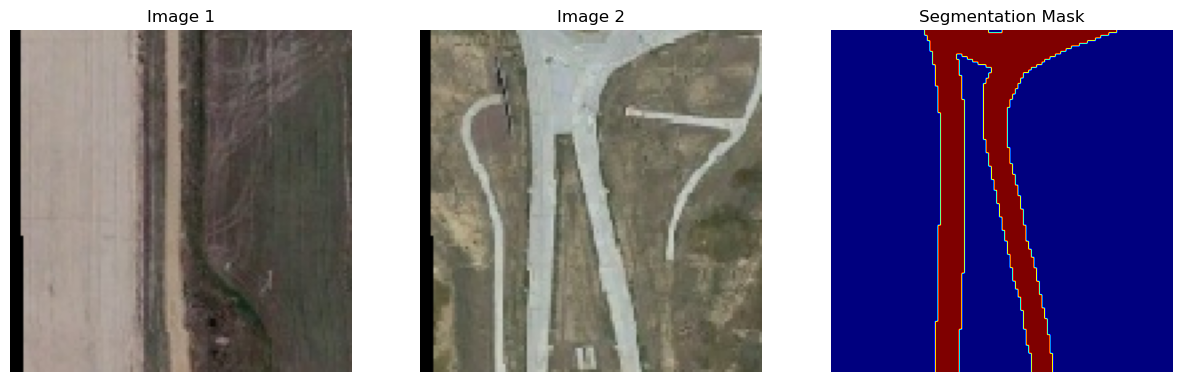

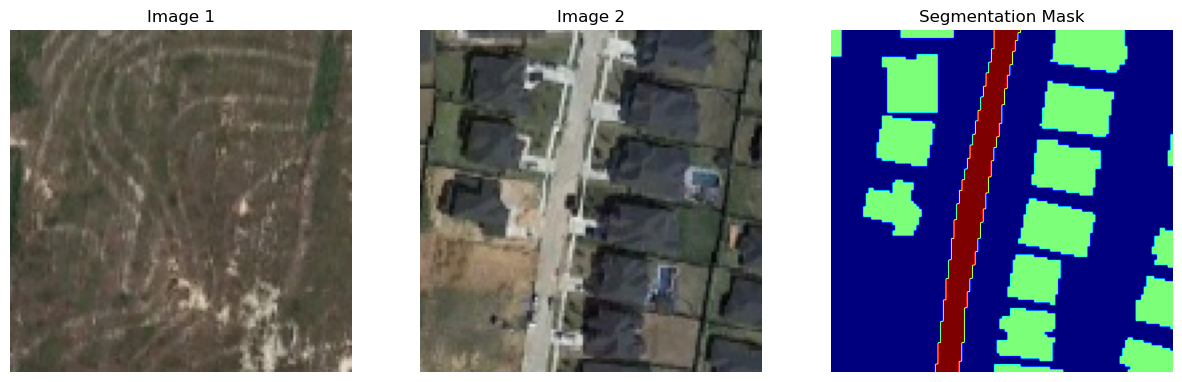

In [357]:
train_dataset = ChangeDetectionDataset(
    x1_dir = r'C:\Users\HP\Desktop\All_python_project\Change_detection_building_&_road\input_data\dataset\train\image_1',
    x2_dir = r'C:\Users\HP\Desktop\All_python_project\Change_detection_building_&_road\input_data\dataset\train\image_2', 
    mask_dir = r'C:\Users\HP\Desktop\All_python_project\Change_detection_building_&_road\input_data\dataset\train\mask'
)

validation_dataset = ChangeDetectionDataset(
    x1_dir = r'C:\Users\HP\Desktop\All_python_project\Change_detection_building_&_road\input_data\dataset\validation\image_1',
    x2_dir = r'C:\Users\HP\Desktop\All_python_project\Change_detection_building_&_road\input_data\dataset\validation\image_2', 
    mask_dir = r'C:\Users\HP\Desktop\All_python_project\Change_detection_building_&_road\input_data\dataset\validation\mask'
)


print(len(train_dataset), len(validation_dataset))
train_dataset.plot(10)
validation_dataset.plot(3)

## data loader

In [370]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(validation_dataset, batch_size=4, shuffle=True)

## model building

In [371]:
class ResnetBlock(nn.Module):
    def __init__(self, in_channels=3, out_channels=16, kernel_size=5):
        super(ResnetBlock, self).__init__()
        
        self.res_block = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, padding='same'),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=kernel_size, padding='same'),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )
        
        self.residual_connection = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=1)

    def forward(self, x):
        """ # params
            :x: (Batch, Channel, Height, Width)
        """
        res = self.res_block(x)
        x = self.residual_connection(x)
        return res + x

# test ResnetBlock
x = torch.rand((1 , 3, 128, 128))
res_inst = ResnetBlock()
print(res_inst(x).shape)

# ------------------------------------------------------------------

class Encoder(nn.Module):
    def __init__(self, input_channel:int = 3, first_conv_channel:int = 16  ,n_resnet_block:int = 4):
        super(Encoder, self).__init__()

        res_blocks = []
        maxpool = nn.MaxPool2d(2,2)
        
        for i in range(n_resnet_block):
            input_channel = input_channel if i == 0 else first_conv_channel // 2
            res_blocks.append(ResnetBlock(in_channels=input_channel, out_channels=first_conv_channel, kernel_size=5))
            res_blocks.append(maxpool)
            first_conv_channel *= 2


        self.resnet = nn.Sequential(*res_blocks, )

    def forward(self, x):
        """ # params
            :x: (Batch, Channel, Height, Width)
        """
        x = self.resnet(x)
        return x
                

# test Encoder
x = torch.rand((1 , 3, 128, 128))
enc = Encoder(n_resnet_block = 3)
print(enc(x).shape)

# ----------------------------------------------------------------------------
class Upsample(nn.Module):
    def __init__(self, in_channels):
        super(Upsample, self).__init__()
        self.upsample = nn.Sequential(
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),
            nn.Conv2d(in_channels, in_channels // 2, kernel_size=3, padding=1),
            nn.BatchNorm2d(in_channels // 2),
            nn.ReLU()
        ) 
    
    def forward(self, x):
        """ # params
            :x: (Batch, Channel, Height, Width)
        """
        return self.upsample(x)

# test upsample 
x = torch.rand((1, 64, 32, 32))
ups = Upsample(in_channels = 64)
print(ups(x).shape)

# -------------------------------------------------------------------------------
class Decoder(nn.Module):
    def __init__(self, in_channels=64, out_channels=2):
        super(Decoder, self).__init__()
        
        self.upsample1 = Upsample(in_channels = in_channels)
        self.upsample2 = Upsample(in_channels = in_channels // 2)
        self.upsample3 = Upsample(in_channels = in_channels // 4)

        # (e.g., 2 for binary segmentation)
        self.output_conv = nn.Conv2d(in_channels // 8, out_channels, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.upsample1(x)  # (1, 128, 16, 16) -> (1, 64, 32, 32)
        x = self.upsample2(x)  # (1, 64, 32, 32) -> (1, 32, 64, 64)
        x = self.upsample3(x)  # (1, 32, 64, 64) -> (1, 16, 128, 128)
        x = self.output_conv(x)  # (1, 16, 128, 128) -> (1, 2, 128, 128)
        return x


# Test the Decoder with a tensor of shape (1, 64, 16, 16)
input_tensor = torch.rand((1, 64+64, 16, 16))
decoder = Decoder(in_channels = 128)
output = decoder(input_tensor)
print(output.shape)  # Expected shape: (1, 2, 128, 128)



torch.Size([1, 16, 128, 128])
torch.Size([1, 64, 16, 16])
torch.Size([1, 32, 64, 64])
torch.Size([1, 2, 128, 128])


# model assembly

In [399]:
class Change_detection_model(nn.Module):
    def __init__(self, input_channel:int = 3 ,out_channels:int = 3):
        super(Change_detection_model, self).__init__()
        self.image1_encoder = Encoder(input_channel=input_channel, first_conv_channel=16, n_resnet_block=3)
        self.image2_encoder = Encoder(input_channel=input_channel, first_conv_channel=16, n_resnet_block=3)
        self.decoder = Decoder(in_channels=64, out_channels=out_channels)

    def forward(self, x1, x2):
        x1 = self.image1_encoder(x1)
        x2 = self.image1_encoder(x2)
        x1x2 = torch.abs(x1 - x2)
        y = self.decoder(x1x2)
        return y

# Test the Decoder with a tensor of shape (1, 64, 16, 16)
x1 = torch.rand((2, 3, 128, 128))
x2 = torch.rand((2, 3, 128, 128))

model = Change_detection_model()
output = model(x1, x2)
print(output.shape)  # Expected shape: (1, 2, 128, 128)


torch.Size([2, 3, 128, 128])


# optimizer, loss, device setup

In [411]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score, f1_score, accuracy_score, precision_score, recall_score

# Initialize the model, optimizer, and loss function
model = Change_detection_model(input_channel=3, out_channels=3)
criterion = nn.CrossEntropyLoss()  # Cross-entropy for multi-class segmentation
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training hyperparameters
num_epochs = 5
train_losses = []
val_losses = []
val_metrics = []

# Function to calculate multi-class segmentation metrics
def calculate_multiclass_metrics(pred, target, n_classes):
    pred = pred.cpu().numpy().flatten()
    target = target.cpu().numpy().flatten()
    
    iou = jaccard_score(target, pred, average='macro', labels=list(range(n_classes)))
    dice = f1_score(target, pred, average='macro')
    # accuracy = accuracy_score(target, pred)
    # precision = precision_score(target, pred, average='macro')
    # recall = recall_score(target, pred, average='macro')
    
    return {
        "Mean IoU": iou,
        "Mean Dice Coefficient": dice,
        # "Accuracy": accuracy,
        # "Mean Precision": precision,
        # "Mean Recall": recall
    }



Epoch 1/5 - Training: 100%|██████████| 39/39 [00:31<00:00,  1.24it/s]


Epoch [1/5], Training Loss: 0.7124


Epoch 1/5 - Validation: 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]


Epoch [1/5], Validation Loss: 0.5559
Validation Metrics: {'Mean IoU': 0.27593415449580433, 'Mean Dice Coefficient': 0.33350927402181746}


Epoch 2/5 - Training: 100%|██████████| 39/39 [00:26<00:00,  1.48it/s]


Epoch [2/5], Training Loss: 0.4893


Epoch 2/5 - Validation: 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]


Epoch [2/5], Validation Loss: 0.6483
Validation Metrics: {'Mean IoU': 0.26967279522529264, 'Mean Dice Coefficient': 0.3216665099428964}


Epoch 3/5 - Training: 100%|██████████| 39/39 [00:26<00:00,  1.48it/s]


Epoch [3/5], Training Loss: 0.4042


Epoch 3/5 - Validation: 100%|██████████| 8/8 [00:03<00:00,  2.21it/s]


Epoch [3/5], Validation Loss: 0.4622
Validation Metrics: {'Mean IoU': 0.42048527581671563, 'Mean Dice Coefficient': 0.5465645479347999}


Epoch 4/5 - Training: 100%|██████████| 39/39 [00:26<00:00,  1.46it/s]


Epoch [4/5], Training Loss: 0.3367


Epoch 4/5 - Validation: 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]


Epoch [4/5], Validation Loss: 0.3485
Validation Metrics: {'Mean IoU': 0.6380183316353992, 'Mean Dice Coefficient': 0.7702683322805529}


Epoch 5/5 - Training: 100%|██████████| 39/39 [00:28<00:00,  1.38it/s]


Epoch [5/5], Training Loss: 0.2960


Epoch 5/5 - Validation: 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]


Epoch [5/5], Validation Loss: 0.3499
Validation Metrics: {'Mean IoU': 0.6227611333937726, 'Mean Dice Coefficient': 0.7563484884946271}


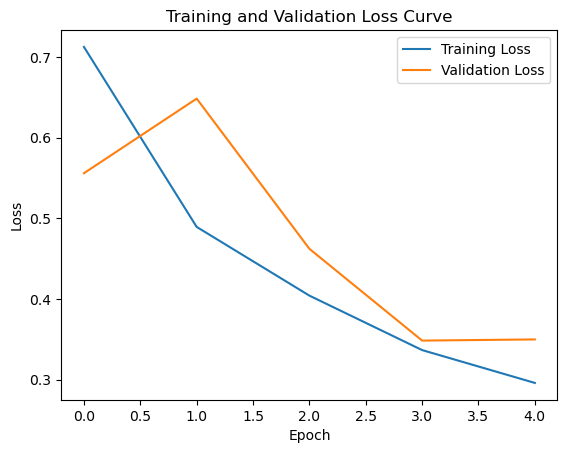

In [412]:

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for x1, x2, masks, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        x1, x2, masks = x1.to(device), x2.to(device), masks.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(x1, x2)
        
        # Calculate loss
        loss = criterion(outputs, masks)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Track running training loss
        running_train_loss += loss.item()
    
    # Average train loss for the epoch
    epoch_train_loss = running_train_loss / len(train_loader)
    train_losses.append(epoch_train_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_train_loss:.4f}")
    
    # Validation
    model.eval()
    running_val_loss = 0.0
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for x1, x2, masks, _ in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
            x1, x2, masks = x1.to(device), x2.to(device), masks.to(device)
            
            # Forward pass
            outputs = model(x1, x2)
            loss = criterion(outputs, masks)
            running_val_loss += loss.item()
            
            # Get predicted classes and store them
            preds = torch.argmax(outputs.softmax(dim=1), dim=1)
            all_preds.append(preds)
            all_targets.append(masks)
    
    # Calculate mean validation loss
    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    
    # Concatenate all predictions and targets for metric calculation
    all_preds = torch.cat(all_preds).cpu()
    all_targets = torch.cat(all_targets).cpu()
    metrics = calculate_multiclass_metrics(all_preds, all_targets, n_classes=3)
    val_metrics.append(metrics)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {epoch_val_loss:.4f}")
    print("Validation Metrics:", metrics)

# Plotting the training and validation loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.show()

In [430]:
i = 2

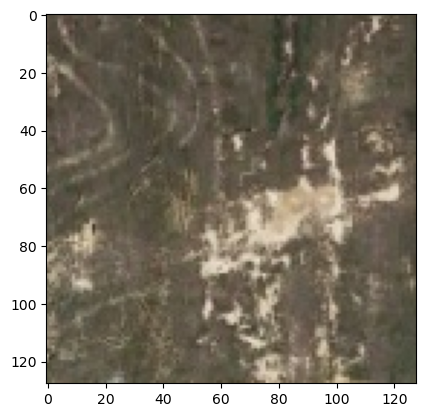

In [431]:
plt.imshow(np.dstack(x1[i].numpy()))

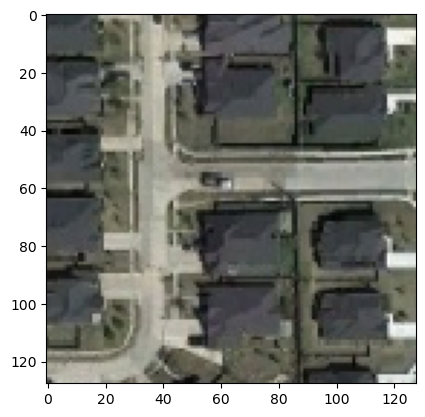

In [432]:
plt.imshow(np.dstack(x2[i].numpy()))

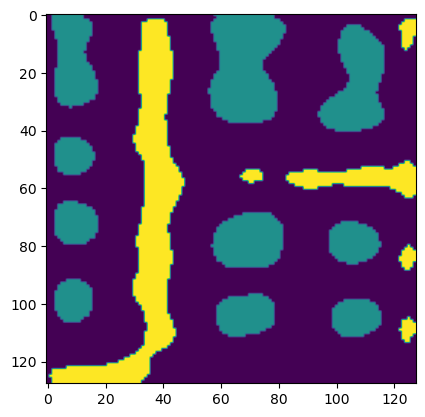

In [433]:
plt.imshow(outputs[i].softmax(0).argmax(0))